In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import folium
from folium import plugins
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes

In [3]:
gdf = gpd.read_file("Hazard-Data/santa_clara_fldzncat_wgs84.shp")

In [4]:
gdf.tail()

,OBJECTID,DFIRM_ID,VERSION_ID,FLD_AR_ID,STUDY_TYP,FLD_ZONE,ZONE_SUBTY,FLDZ_CAT,geometry
2176,58182,06085C,1.1.1.0,06085C_2109,NP,D,None,Undetermined But Possible Flood Hazard,POLYGON ((-121.8769780322869 37.40425803389827...
2177,58183,06085C,1.1.1.0,06085C_2110,NP,AO,None,100-year flood,POLYGON ((-121.9160990851336 37.36795647773774...
2178,58184,06085C,1.1.1.0,06085C_2111,NP,AH,None,100-year flood,POLYGON ((-121.9721504133453 37.41602119405542...
2179,58185,06085C,1.1.1.0,06085C_2112,NP,D,None,Undetermined But Possible Flood Hazard,POLYGON ((-121.8999692385972 37.39879034477614...
2180,58186,06085C,1.1.1.0,06085C_2160,NP,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,500-year flood,POLYGON ((-121.8736401329539 37.36257774496531...


In [5]:
gdf["centroid_lon"] = gdf.centroid.x
gdf["centroid_lat"] = gdf.centroid.y


In [6]:
gdf.head().T

,0,1,2,3,4
OBJECTID,2044,24125,24126,24127,24128
DFIRM_ID,06001C,06085C,06085C,06085C,06085C
VERSION_ID,1.1.1.0,1.1.1.0,1.1.1.0,1.1.1.0,1.1.1.0
FLD_AR_ID,06001C_582,06085C_65,06085C_66,06085C_67,06085C_68
STUDY_TYP,NP,NP,NP,NP,NP
FLD_ZONE,X,D,A,AE,AE
ZONE_SUBTY,AREA OF MINIMAL FLOOD HAZARD,None,None,None,None
FLDZ_CAT,Mimimal Flood Hazard,Undetermined But Possible Flood Hazard,100-year flood,100-year flood,100-year flood
geometry,POLYGON ((-121.9225071386006 37.45521921615953...,POLYGON ((-121.9568530436407 37.23614328898123...,POLYGON ((-121.8746181781512 37.22916419738674...,POLYGON ((-122.1644527576474 37.38738375413728...,POLYGON ((-121.6087721959322 37.12788830743234...
centroid_lon,-121.923,-121.954,-121.874,-122.165,-121.609


In [7]:
gdf.reset_index(inplace=True)
gdf.head().T

,0,1,2,3,4
index,0,1,2,3,4
OBJECTID,2044,24125,24126,24127,24128
DFIRM_ID,06001C,06085C,06085C,06085C,06085C
VERSION_ID,1.1.1.0,1.1.1.0,1.1.1.0,1.1.1.0,1.1.1.0
FLD_AR_ID,06001C_582,06085C_65,06085C_66,06085C_67,06085C_68
STUDY_TYP,NP,NP,NP,NP,NP
FLD_ZONE,X,D,A,AE,AE
ZONE_SUBTY,AREA OF MINIMAL FLOOD HAZARD,None,None,None,None
FLDZ_CAT,Mimimal Flood Hazard,Undetermined But Possible Flood Hazard,100-year flood,100-year flood,100-year flood
geometry,POLYGON ((-121.9225071386006 37.45521921615953...,POLYGON ((-121.9568530436407 37.23614328898123...,POLYGON ((-121.8746181781512 37.22916419738674...,POLYGON ((-122.1644527576474 37.38738375413728...,POLYGON ((-121.6087721959322 37.12788830743234...


In [8]:
middle_lat = gdf["centroid_lat"].median()
middle_lon = gdf["centroid_lon"].median()
median_coords = [middle_lat, middle_lon]

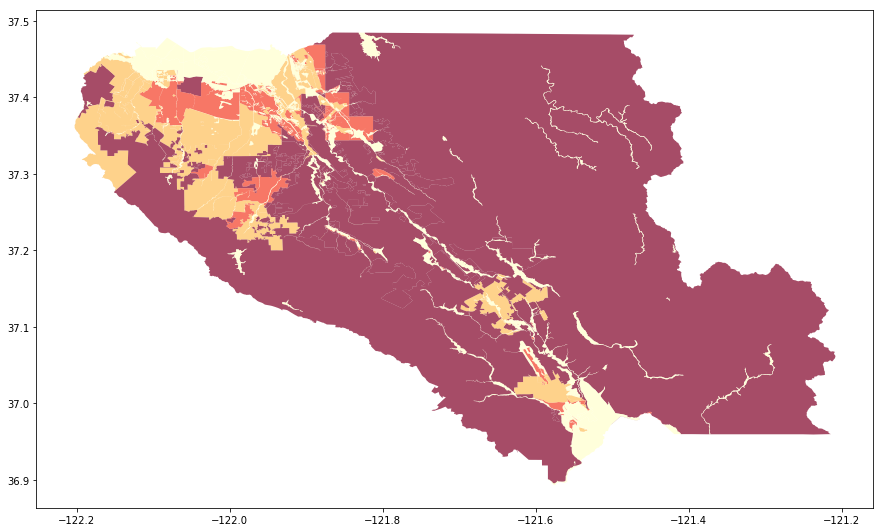

In [9]:
gdf.plot(figsize = (15, 15), \
         column="FLDZ_CAT",linewidth=1, cmap="YlOrRd",alpha=0.7)

## Spatial Operation - Intersection

In [10]:
from shapely.geometry import Point
from IPython.display import HTML
import imgkit

In [11]:
ind = np.random.randint(0, len(gdf) - 1)
sample_lon = gdf["centroid_lon"][ind]
sample_lat = gdf["centroid_lat"][ind]

# Create a shapely point geometry fro the sample lon, lat


In [12]:

sample_lon, sample_lat = -121.889234, 37.263551

pt = Point(sample_lon, sample_lat)
#Use the Geodataframe to find the intersecting Lat/lon
new_df = gdf[gdf.intersects(pt)]

new_df.T

,360
index,360
OBJECTID,56269
DFIRM_ID,06085C
VERSION_ID,1.1.1.0
FLD_AR_ID,06085C_2094
STUDY_TYP,NP
FLD_ZONE,D
ZONE_SUBTY,None
FLDZ_CAT,Undetermined But Possible Flood Hazard
geometry,"POLYGON ((-121.934596048682 37.23607810550417,..."


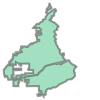

In [13]:
new_df.iloc[0].geometry

In [14]:
fz_html = f"<br/><font size='+1'><i><b>{new_df.iloc[0]['FLDZ_CAT']} zone</i></b><br/><br/>"
prop_html = f"<br/>The property is in <i><b>{new_df.iloc[0]['FLDZ_CAT']} zone</i></b><br/><br/>"
HTML(fz_html)
    

In [123]:
curr_map = folium.Map((sample_lat, sample_lon), 
                      
                      zoom_start= 14)
folium.Marker((sample_lat, sample_lon), popup=prop_html).add_to(curr_map)
folium.GeoJson(new_df.to_json(), tooltip=fz_html).add_to(curr_map)

curr_map

In [16]:
curr_map.save("Hazard-Data/flood_zone.html")

## Spatial Operations on Raster

In [17]:
import rasterio
from rasterio.vrt import WarpedVRT
import seaborn as sns
import mercantile

In [18]:
tif_file = "Hazard-Data/whp2018_cnt.tif"

### Thumbnail overoview of raster

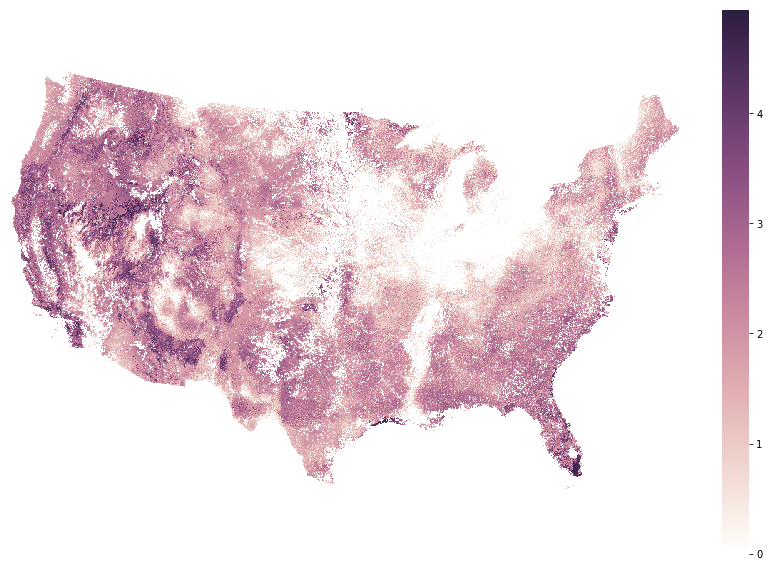

In [35]:
def stretch(arr):    
    arr[arr<1] = 1
    arr = np.log10(arr)
    """
    min_arr, max_arr = arr.min(), arr.max()
    print(min_arr, max_arr)
    return ((arr - min_arr) * 255.0 / (max_arr - min_arr)).astype('uint16')
    """
    return arr

with rasterio.open(tif_file) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[-3] # let's look at the smallest thumbnail
    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15, 10))
sns.heatmap(stretch(thumbnail), 
            cmap= cmap, 
            square=True, xticklabels=False, yticklabels=False)



In [114]:
categories = [("Very Low Risk", (63, 163, 0)),  ("Low Risk", (159, 255, 148)), 
              ("Moderate Risk" , (252, 255, 105)), ("High Risk" , (254, 162, 3)), 
              ("Very High Risk", (234, 30, 0))]
perc_list = np.percentile(thumbnail, (44.44, 66.67, 83.33, 94.44, 100)).tolist()
perc_list, categories[bisect_right(perc_list, 121.52380952380952)]

([1.0, 21.0, 142.0, 647.0, 85978.0], ('Moderate Risk', (252, 255, 105)))

In [115]:
def wf_catg(num): 
    return categories[bisect_right(perc_list, num)]

In [116]:
(np.array(wf_catg(121.52380952380952)[1])/255.).tolist()

[0.9882352941176471, 1.0, 0.4117647058823529]

In [117]:
import pyproj

utm = pyproj.Proj(init = 'epsg:3857') # Pass CRS of image from rasterio
lonlat = pyproj.Proj(init='epsg:4326')
lng, lat = (sample_lon, sample_lat)

#Get Web Mercator Tile (Google Maps Schema) at a given Zoom Level and find it's bounding box


In [118]:
from bisect import bisect_right

## Accessing Raster Values

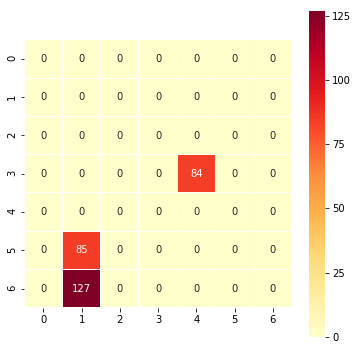

In [188]:
tile = mercantile.tile(lng, lat, 14)

merc_bounds = mercantile.xy_bounds(tile)
lllon, lllat = pyproj.transform(utm, lonlat, merc_bounds.left, merc_bounds.bottom)
urlon, urlat = pyproj.transform(utm, lonlat, merc_bounds.right, merc_bounds.top)

m = folium.Map([(lllat + urlat)/2, (lllon + urlon)/2], zoom_start= 12)

with WarpedVRT(rasterio.open(tif_file), crs='epsg:3857') as img_vrt: 
    
    window = img_vrt.window(*merc_bounds)

    img_arr = img_vrt.read(window=window)[0]
    
    # Extrating value : wf_catg(np.mean(img_arr[img_arr > 0]))[0]
    
    popup = f"""<br/>There's a <i><b> 
    {wf_catg(np.mean(img_arr[img_arr > 0]))[0]} 
    Wildfire zone </b></i> w/ in 
   <b> {np.round((merc_bounds.top - merc_bounds.bottom)/ (2 * 1609), 1)} mi </b>of this property
    """
    
    # Visulaization
    
    plt.figure(figsize=(6, 6))
    
    folium.Marker([lat, lng],  popup = popup).add_to (m)
    
    folium.raster_layers.ImageOverlay(
            image=img_arr,
            bounds=[[lllat, lllon], [urlat, urlon]],
            origin='upper',
            #opacity = 0.5
            colormap=lambda x: (1, 0.3 , 0, x)
    ).add_to(m)
    
    sns.heatmap(img_arr, 
                annot=True, 
                cmap="YlOrRd", 
                square=True, 
                fmt="d", 
                linewidths=.1)

m

## Area calc

In [180]:
x_pixel_width = (merc_bounds.right - merc_bounds.left) / window.width
y_pixel_width = (merc_bounds.top - merc_bounds.bottom) / window.height

HTML(f"<br/><font size='+1'>Pixel dimension : [{round(x_pixel_width)} m * {round(y_pixel_width)} m], Tot Area : {round((merc_bounds.right - merc_bounds.left) * (merc_bounds.top - merc_bounds.bottom) / 1e6, 3)} sq.km")
